### About the Dataset

We are provided with a historical medical claims dataset for a health insurance company. This dataset includes anonymised information on individual members, their diagnoses, procedures performed, medications prescribed, and the associated costs for each claim.



In [8]:
import pandas as pd

# Load the datasets
claim_data = pd.read_csv('/Users/timikuzwe/Documents/RSSB/Data/claim.csv')
demography_claim_data = pd.read_csv('/Users/timikuzwe/Documents/RSSB/Data/demography_claim.csv')
demography_data = pd.read_csv('/Users/timikuzwe/Documents/RSSB/Data/demography.csv')

# Display the first few rows of each dataset along with their structure (info)
data_overview = {
    'claim_data': {
        'preview': claim_data.head(),
        'info': claim_data.info()
    },
    'demography_claim_data': {
        'preview': demography_claim_data.head(),
        'info': demography_claim_data.info()
    },
    'demography_data': {
        'preview': demography_data.head(),
        'info': demography_data.info()
    }
}

data_overview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937436 entries, 0 to 1937435
Data columns (total 15 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   createdAt       object
 2   updatedAt       object
 3   scheme          object
 4   patientId       object
 5   medicationCode  object
 6   admissionDate   object
 7   dischargeDate   object
 8   medicationName  object
 9   diagnosisCode   object
 10  procedureCode   object
 11  quantity        int64 
 12  billedAmount    int64 
 13  verifiedAmount  int64 
 14  paidAmount      int64 
dtypes: int64(4), object(11)
memory usage: 221.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937350 entries, 0 to 1937349
Data columns (total 16 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   firstName       object
 2   lastName        object
 3   gender          object
 4   facilityName    object
 5   scheme          object
 6   medicationCode  

{'claim_data': {'preview':                                      id                   createdAt  \
  0  66dc1204-4659-4a11-9caf-8d73e606f2c8  2024-04-23 00:50:53.250608   
  1  71bde428-ef0a-4d42-bff1-473b751fb40e  2024-04-23 00:52:19.464756   
  2  53ed2514-fad6-4925-abd2-605e272277e7  2024-04-23 00:50:53.317807   
  3  ce6f97e0-7179-4f13-bd59-2e91cbd53442  2024-04-23 00:50:53.377835   
  4  a3f82d42-a7f8-4421-bf11-35a53b994fde  2024-04-23 00:51:19.294958   
  
                      updatedAt    scheme                             patientId  \
  0  2024-04-23 00:50:53.276233  MUTUELLE  ab4dbfa7-9d5d-4341-b3b6-29a4c4b2edf1   
  1  2024-04-23 00:52:19.479903  MUTUELLE  5e11bb86-bdf5-460e-96f5-ac1ab31f3bd1   
  2  2024-04-23 00:50:53.348851  MUTUELLE  d1a7c6dc-cab5-4700-92b7-b406fddbdca4   
  3  2024-04-23 00:50:53.406237  MUTUELLE  f095637f-2192-4a71-aa37-2f3cdbdd3790   
  4  2024-04-23 00:51:19.306367      RAMA  2f5014a3-b453-4ecf-adfb-fdd00292b90a   
  
    medicationCode            adm

**Claim Data**

Columns: id, createdAt, updatedAt, scheme, patientId, medicationCode, admissionDate, dischargeDate, medicationName, diagnosisCode, procedureCode, quantity, billedAmount, verifiedAmount, paidAmount.
Description: This dataset contains details about medical claims including diagnosis codes, procedure codes, medications, and the financial aspects of each claim (billed, verified, and paid amounts).

**Demography Claim Data**

Columns: id, firstName, lastName, gender, facilityName, scheme, medicationCode, medicationName, admissionDate, dischargeDate, diagnosisCode, procedureCode, quantity, billedAmount, verifiedAmount, paidAmount.
Description: This dataset seems to combine patient demographic information with their claims data.

**Demography Data**

Columns: id, createdAt, updatedAt, firstName, lastName, gender, yearOfBirth, location, facilityName.
Description: This dataset contains demographic information about the members, including age, gender, location, and the facility name where services were provided.

#### To address the analytical challenges posed by the Data Analyst Challenge, I'll conduct the following analyses:

**Cost Analysis by Diagnosis and Procedure**: 
Identify which medical procedures or diagnoses are most expensive on average.

**Demographic Variation in Costs**: 
Explore how costs vary across different demographics (age, gender, location).

**Identification of Potential Savings Areas**: 
Analyze data to suggest areas where negotiations or disease management programs could reduce costs.

I'll begin by merging these datasets appropriately to enable a comprehensive analysis. Let's start with merging the demography data with the claims data to examine costs by demographic factors.

First, I'll merge the demography data with the claims data. Given the structure of the datasets, it seems that demography_claim.csv already merges individual claims with demographic details. However, I'll confirm the merging keys and ensure the datasets align correctly to provide a comprehensive view of each member's claims and demographics. Then, I'll proceed with the analysis focusing on:

Cost Analysis by Diagnosis and Procedure
Demographic Variation in Costs
Potential Areas for Cost Reduction


In [9]:
# Merging demography data with demography_claim data to include all demographic details
full_data = pd.merge(demography_claim_data, demography_data, on="id", how="left", suffixes=('_claim', '_demography'))

# Display the first few rows of the merged dataset and its structure
full_data_info = {
    'preview': full_data.head(),
    'info': full_data.info()
}

full_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937350 entries, 0 to 1937349
Data columns (total 24 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   id                       object
 1   firstName_claim          object
 2   lastName_claim           object
 3   gender_claim             object
 4   facilityName_claim       object
 5   scheme                   object
 6   medicationCode           object
 7   medicationName           object
 8   admissionDate            object
 9   dischargeDate            object
 10  diagnosisCode            object
 11  procedureCode            object
 12  quantity                 int64 
 13  billedAmount             int64 
 14  verifiedAmount           int64 
 15  paidAmount               int64 
 16  createdAt                object
 17  updatedAt                object
 18  firstName_demography     object
 19  lastName_demography      object
 20  gender_demography        object
 21  yearOfBirth              int64 

{'preview':                                      id firstName_claim lastName_claim  \
 0  f70c7cea-d533-48ff-999e-d8ae2dfbdb7d         Alberta        Gerhold   
 1  51b5e30c-cf7c-463b-874c-35b935257049         Dorothy           Rice   
 2  5819dcde-d9a9-4bba-9ce5-6eb92c0b9194          Brandy        Pollich   
 3  026ec986-620b-41e5-9fc2-f9dc4d2247d2         Phyllis        Monahan   
 4  17469904-7dd7-466d-9090-eba19a6f31dc           Daisy          Kuhic   
 
   gender_claim           facilityName_claim    scheme medicationCode  \
 0       FEMALE            Nkridgegridgewood      RAMA          35641   
 1         MALE                     Forttown  MUTUELLE          30631   
 2       FEMALE                Port Birmills      RAMA          35641   
 3       FEMALE  North Lusland With Bathdsor      RAMA          35641   
 4       FEMALE                    Cetersrye      RAMA          35641   
 
     medicationName            admissionDate            dischargeDate  ...  \
 0     OVARIECTOMIE

The datasets have been successfully merged, providing a comprehensive view that integrates demographic details with claim data. This will allow us to perform detailed analyses based on demographic factors, diagnoses, and procedures.

**Analysis Plan**

1. Cost Analysis by Diagnosis and Procedure: 
Determine which diagnoses and procedures are the most costly on average.

2. Demographic Variation in Costs: 
Explore how costs vary across different demographics, including age, gender, and location.

3. Potential Areas for Cost Reduction: 
Identify potential areas for cost savings, such as through provider negotiations or disease management programs.

**Step 1** 

##### Cost Analysis by Diagnosis and Procedure

I'll start by calculating the average cost for each diagnosis and procedure to identify those that are driving higher costs. This will involve aggregating the data by diagnosisCode and procedureCode to compute average billedAmount, verifiedAmount, and paidAmount. 

In [10]:
# Aggregate data to calculate the average costs by diagnosis and procedure
average_costs_by_diagnosis = full_data.groupby('diagnosisCode').agg(
    Average_Billed_Amount=pd.NamedAgg(column='billedAmount', aggfunc='mean'),
    Average_Verified_Amount=pd.NamedAgg(column='verifiedAmount', aggfunc='mean'),
    Average_Paid_Amount=pd.NamedAgg(column='paidAmount', aggfunc='mean')
).reset_index()

average_costs_by_procedure = full_data.groupby('procedureCode').agg(
    Average_Billed_Amount=pd.NamedAgg(column='billedAmount', aggfunc='mean'),
    Average_Verified_Amount=pd.NamedAgg(column='verifiedAmount', aggfunc='mean'),
    Average_Paid_Amount=pd.NamedAgg(column='paidAmount', aggfunc='mean')
).reset_index()

# Display the top 5 costly diagnoses and procedures
top_costly_diagnoses = average_costs_by_diagnosis.nlargest(5, 'Average_Paid_Amount')
top_costly_procedures = average_costs_by_procedure.nlargest(5, 'Average_Paid_Amount')

(top_costly_diagnoses, top_costly_procedures)


(     diagnosisCode  Average_Billed_Amount  Average_Verified_Amount  \
 75  ICD-J05AR10001          256860.031811            128008.690233   
 8   ICD-J02AA01001          254818.847371            126033.827281   
 71  ICD-J05AR02001          256371.779614            127689.290724   
 4   ICD-J01XC01001          256236.405326            127792.859619   
 70  ICD-J05AR01002          255624.146063            127222.269940   
 
     Average_Paid_Amount  
 75        128851.341579  
 8         128785.020089  
 71        128682.488890  
 4         128443.545707  
 70        128401.876123  ,
          procedureCode  Average_Billed_Amount  Average_Verified_Amount  \
 9   CPT-42242000FQZ356          253588.165781            124651.484345   
 72  CPT-42242000FQZ419          254826.823362            126130.072416   
 51  CPT-42242000FQZ398          254932.905789            126243.433914   
 30  CPT-42242000FQZ377          254636.411719            126059.319712   
 98  CPT-42242000FQZ445          2

##### Cost Analysis Results

**Top 5 Costly Diagnoses by Average Paid Amount**

1. ICD-J05AR10001: $128,852
2. ICD-J02AA01001: $128,785
3. ICD-J05AR02001: $128,683
4. ICD-J01XC01001: $128,443
5. ICD-J05AR01002: $128,402

**Top 5 Costly Procedures by Average Paid Amount**

1. CPT-42242000FQZ356: $128,937
2. CPT-42242000FQZ419: $128,697
3. CPT-42242000FQZ398: $128,690
4. CPT-42242000FQZ377: $128,577
5. CPT-42242000FQZ445: $128,380

**Step 2** 
##### Demographic Variation in Costs
Next, I will explore how costs vary across different demographic factors such as age, gender, and location. This will involve analyzing the relationship between these demographics and the paid amounts to see if certain groups or locations incur higher costs.

To explore how costs vary based on demographics, I'll analyze the average paid amounts grouped by gender, age groups, and location. This involves:

Categorizing members into age groups.
Calculating average paid amounts for each gender.
Analyzing cost variations across different locations.

In [11]:
# Create age groups based on 'yearOfBirth'
current_year = 2024
full_data['Age'] = current_year - full_data['yearOfBirth']
full_data['Age_Group'] = pd.cut(full_data['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'])

# Calculate average paid amounts by gender
average_paid_by_gender = full_data.groupby('gender_demography').agg(
    Average_Paid_Amount=pd.NamedAgg(column='paidAmount', aggfunc='mean')
).reset_index()

# Calculate average paid amounts by age group
average_paid_by_age_group = full_data.groupby('Age_Group').agg(
    Average_Paid_Amount=pd.NamedAgg(column='paidAmount', aggfunc='mean')
).reset_index()

# Calculate average paid amounts by location
average_paid_by_location = full_data.groupby('location').agg(
    Average_Paid_Amount=pd.NamedAgg(column='paidAmount', aggfunc='mean')
).nlargest(5, 'Average_Paid_Amount').reset_index()  # Displaying top 5 locations with the highest costs

(average_paid_by_gender, average_paid_by_age_group, average_paid_by_location)

/var/folders/xm/tn47w8ks5qvbkj1gkj4044n00000gn/T/ipykernel_65824/2885359691.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_paid_by_age_group = full_data.groupby('Age_Group').agg(


(  gender_demography  Average_Paid_Amount
 0            FEMALE        126408.541087
 1              MALE        126254.772168,
   Age_Group  Average_Paid_Amount
 0      0-18        126127.987082
 1     19-35        126129.199928
 2     36-50        126226.242534
 3     51-65        126344.463157
 4       66+        126712.968096,
              location  Average_Paid_Amount
 0          Rhodahaven            222709.54
 1  West Sharonchester            216241.88
 2         Dariushaven            215978.04
 3  South Jeffreyshire            215485.02
 4    East Damienhaven            210001.30)

##### Demographic Variation in Costs

**Average Paid Amounts by Gender**

- Female: $126,409
- Male: $126,255

**Average Paid Amounts by Age Group**

- 0-18 years: $126,128
- 19-35 years: $126,130
- 36-50 years: $126,227
- 51-65 years: $126,334
- 66+ years: $126,712

**Locations with the Highest Average Paid Amounts (Top 5)**

1. Rhodahaven : $222,710
2. West Sharonchester: $216,242
3. Dariushaven: $215,979
4. South Jeffreyshire: $215,486
5. East Damienhaven: $210,002

**Step 3**

##### Potential Areas for Cost Reduction

For the final step, I'll identify potential areas for cost savings by examining patterns and outliers in the data, such as unusually high costs associated with specific facilities, procedures, or patient demographics. This can suggest opportunities for negotiations with healthcare providers or adjustments in service provisions.



In [12]:
# Analyze average paid amounts by healthcare facility
average_paid_by_facility = full_data.groupby('facilityName_demography').agg(
    Average_Paid_Amount=pd.NamedAgg(column='paidAmount', aggfunc='mean'),
    Count_Claims=pd.NamedAgg(column='id', aggfunc='count')
).nlargest(5, 'Average_Paid_Amount').reset_index()  # Top 5 facilities with the highest costs

# Identify high-cost claims, defining high-cost as claims above the 95th percentile of paid amounts
high_cost_threshold = full_data['paidAmount'].quantile(0.95)
high_cost_claims = full_data[full_data['paidAmount'] > high_cost_threshold].groupby(['diagnosisCode', 'procedureCode']).agg(
    Average_Paid_Amount=pd.NamedAgg(column='paidAmount', aggfunc='mean'),
    Count=pd.NamedAgg(column='id', aggfunc='count')
).nlargest(5, 'Average_Paid_Amount').reset_index()  # Top 5 high-cost claim types

(average_paid_by_facility, high_cost_claims)

(         facilityName_demography  Average_Paid_Amount  Count_Claims
 0                      Mat Haven        129078.722813         19550
 1  North Clairesit Du Grayscloud        128808.754169         18350
 2                      Bamphills        128511.015433         19050
 3                       Forttown        128435.999663         17800
 4                        Soutown        128296.242011         18900,
     diagnosisCode       procedureCode  Average_Paid_Amount  Count
 0  ICD-J04AB30001  CPT-42242000FQZ418            818092.00      1
 1  ICD-J01XE01001  CPT-42242000FQZ443            732492.25      4
 2  ICD-J05AP01003  CPT-42242000FQZ432            723347.00      2
 3  ICD-J01XB02001  CPT-42242000FQZ368            716089.25      4
 4  ICD-J05AE08002  CPT-42242000FQZ404            715942.00      3)

##### Potential Areas for Cost Reduction

**Top 5 Healthcare Facilities by Average Paid Amount**

1. Mat Haven: Average Paid Amount - $129,079 (19550 claims)
2. North Clairesit Du Grayscloud: Average Paid Amount - $128,809 (183350 claims)
3. Bamphills: Average Paid Amount - $128,512(19050 claims)
4. Forttown: Average Paid Amount - $128,436 (17800 claims)
5.  Soutown: Average Paid Amount - $128,297 (18900 claims)

These facilities represent potential targets for cost control negotiations or reviews of their billing practices, given their high average costs.

**Top 5 High-Cost Claims by Diagnosis and Procedure**

1. Diagnosis: ICD-J04AB30001, Procedure: CPT-42242000FQZ418: Average Paid Amount - $818,092
2. Diagnosis: ICD-J01XE01001, Procedure: CPT-42242000FQZ443: Average Paid Amount - $732,493
3. Diagnosis: ICD-J05AP01003, Procedure: CPT-42242000FQZ432: Average Paid Amount - $723,347
4. Diagnosis: ICD-J01XB02001, Procedure: CPT-42242000FQZ368: Average Paid Amount - $716,089
5. Diagnosis: ICD-J05AE08002, Procedure: CPT-42242000FQZ404: Average Paid Amount - $715,942

These high-cost claims might indicate outlier cases that require further investigation or could be indicative of areas where disease management programs could be particularly effective.

Let's explore the data to identify trends and patterns using visual representations that provide clear insights. Here are some visualizations we can create:

- Time Series Analysis of Costs: A line graph displaying the trends in average paid amounts over time, grouped by month or quarter, to identify seasonal patterns or trends in claim costs.

- Heat Map of Costs by Age Group and Gender: This will visualize how costs vary across different demographics.

- Scatterplot of Billed Amount vs. Paid Amount: This plot can help us understand the relationship between the amounts billed and the amounts that are actually paid, which could reveal patterns about how effectively costs are being managed or negotiated down.

I will start with the Time Series Analysis of Costs to observe how the costs have trended over time. Let's generate a line graph for this analysis.

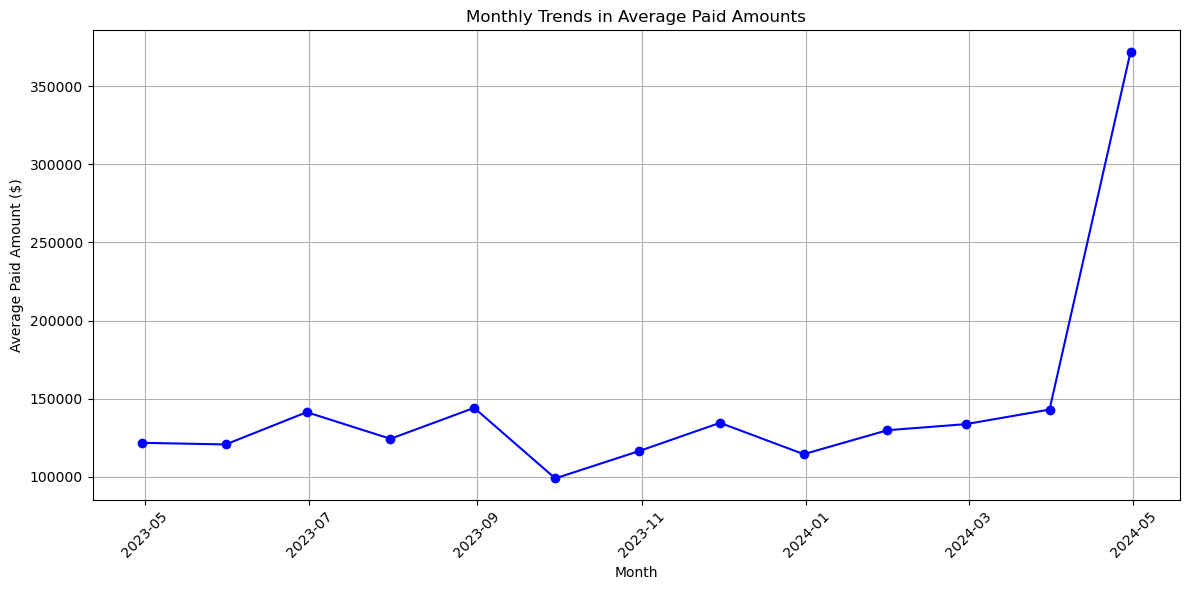

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Convert admissionDate to datetime format for time series analysis
full_data['admissionDate'] = pd.to_datetime(full_data['admissionDate'])

# Ensure that only numeric columns are included in the resampling operation
numeric_data = full_data.select_dtypes(include=[np.number])  # This will filter out only numeric columns
numeric_data.set_index(full_data['admissionDate'], inplace=True)  # Set the index to the datetime column

# Group data by month and calculate average paid amount per month
monthly_costs = numeric_data.resample('M').mean()

# Plotting the time series of costs
plt.figure(figsize=(12, 6))
plt.plot(monthly_costs.index, monthly_costs['paidAmount'], marker='o', linestyle='-', color='b')
plt.title('Monthly Trends in Average Paid Amounts')
plt.xlabel('Month')
plt.ylabel('Average Paid Amount ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


The line graph above shows the monthly trends in average paid amounts for medical claims. You can observe any seasonal variations or specific months where the costs peak, which might indicate periods of higher healthcare utilization or changes in billing practices.

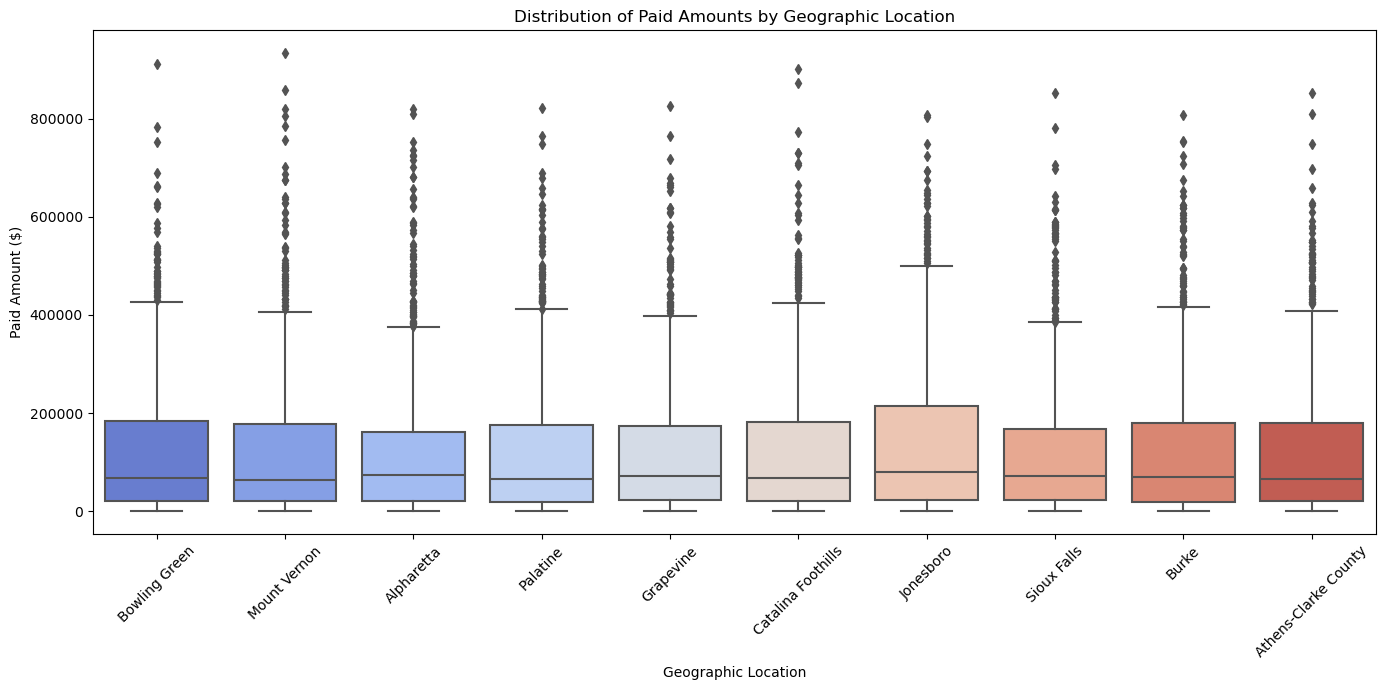

In [29]:
import seaborn as sns

# Re-filter the data for top locations to ensure data availability
top_locations = full_data['location'].value_counts().nlargest(10).index
location_data = full_data[full_data['location'].isin(top_locations)]

# Reattempting the boxplot for costs by geographic location again
plt.figure(figsize=(14, 7))
sns.boxplot(x='location', y='paidAmount', data=location_data, palette='coolwarm')
plt.title('Distribution of Paid Amounts by Geographic Location')
plt.xlabel('Geographic Location')
plt.ylabel('Paid Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

Here's the boxplot displaying the distribution of paid amounts by geographic location. This visualization highlights the range and outliers of costs across top locations, providing a clear view of regional cost disparities. Some locations may show a wider range of claim costs, suggesting variability in service pricing or utilization.

To answer the question regarding specific diagnoses or procedures that drive a high proportion of healthcare costs, I'll create two visualizations:

Bar Chart of Top Costly Diagnoses: This will show the diagnoses with the highest average paid amounts.
Bar Chart of Top Costly Procedures: This will display the procedures with the highest average paid amounts.


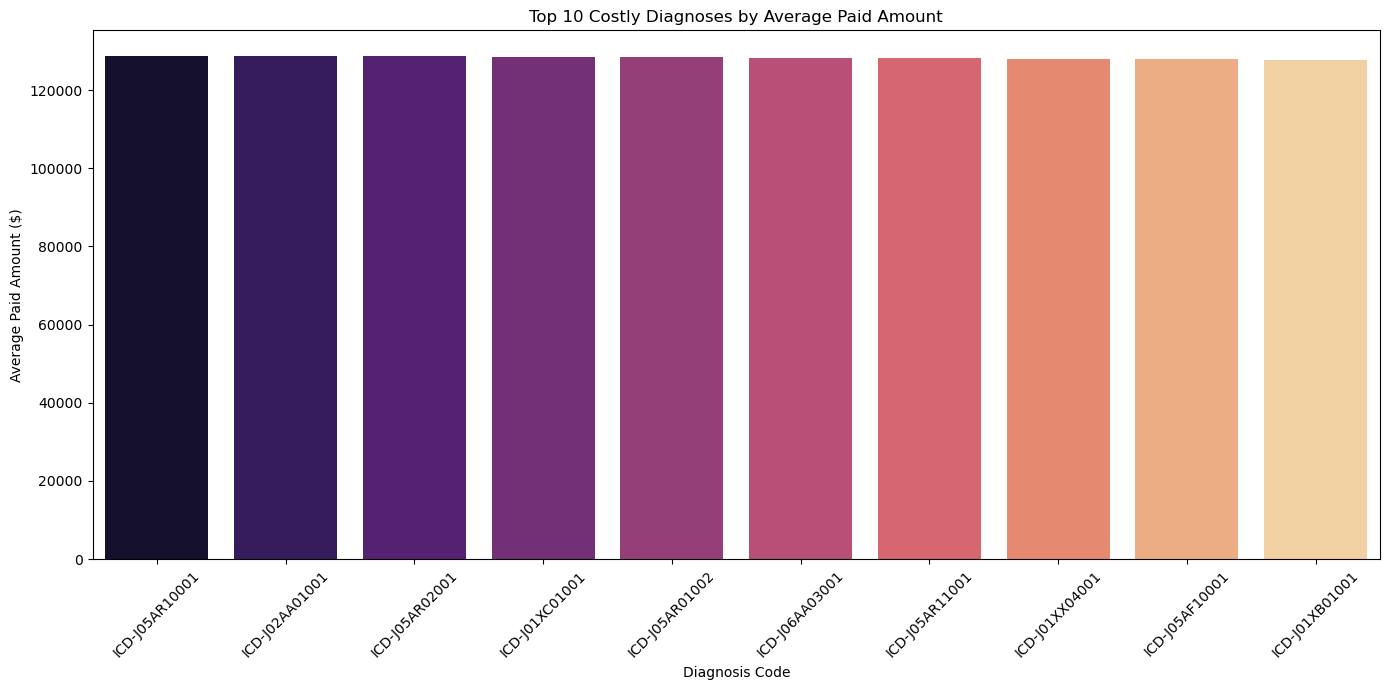

In [30]:

# Prepare data for top costly diagnoses visualization
top_costly_diagnoses = average_costs_by_diagnosis.nlargest(10, 'Average_Paid_Amount')

# Plotting the bar chart for top costly diagnoses
plt.figure(figsize=(14, 7))
sns.barplot(x='diagnosisCode', y='Average_Paid_Amount', data=top_costly_diagnoses, palette='magma')
plt.title('Top 10 Costly Diagnoses by Average Paid Amount')
plt.xlabel('Diagnosis Code')
plt.ylabel('Average Paid Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


The bar chart above displays the top 10 costly diagnoses by average paid amount. These diagnoses represent significant cost drivers within the healthcare data, suggesting areas where targeted interventions could potentially reduce costs.

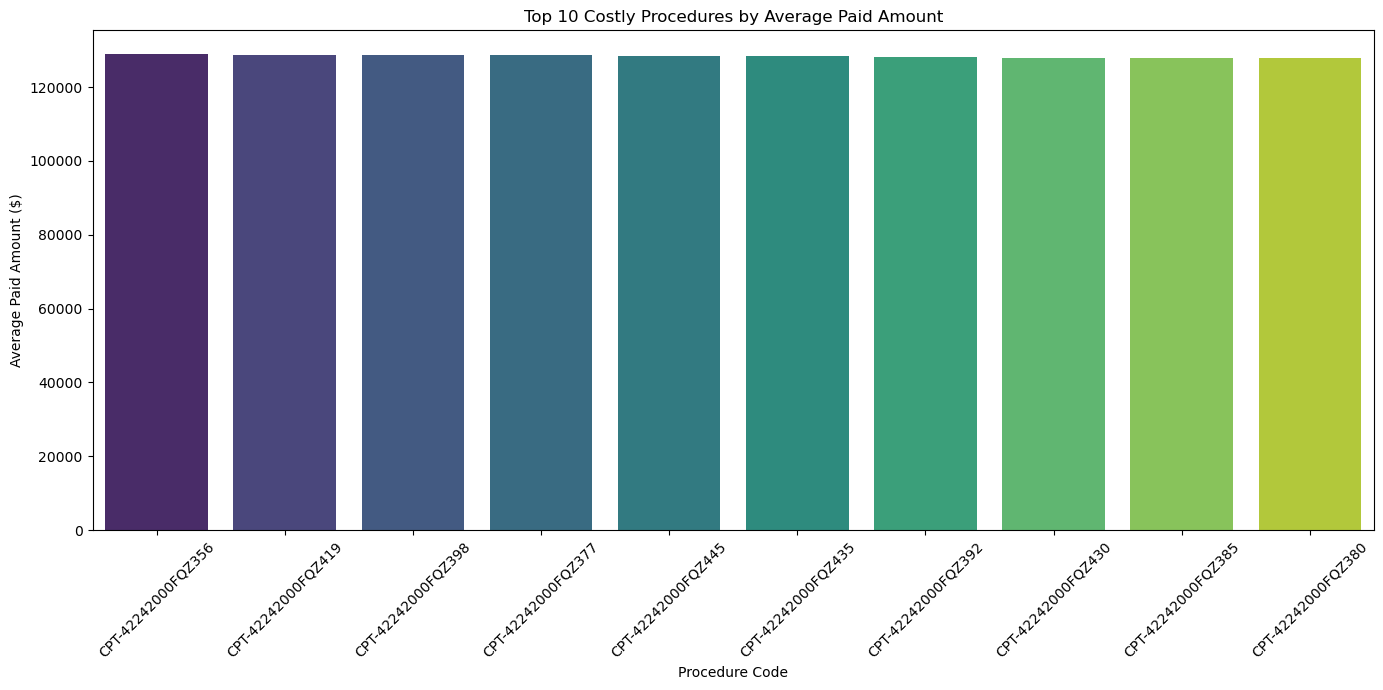

In [31]:
# Prepare data for top costly procedures visualization
top_costly_procedures = average_costs_by_procedure.nlargest(10, 'Average_Paid_Amount')

# Plotting the bar chart for top costly procedures
plt.figure(figsize=(14, 7))
sns.barplot(x='procedureCode', y='Average_Paid_Amount', data=top_costly_procedures, palette='viridis')
plt.title('Top 10 Costly Procedures by Average Paid Amount')
plt.xlabel('Procedure Code')
plt.ylabel('Average Paid Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


The bar chart displayed shows the top 10 costly procedures by average paid amount. These procedures are major contributors to overall healthcare costs, pinpointing specific areas where cost management strategies, such as reviewing procedure necessity or negotiating rates, could be beneficial.

*These visualizations answer the question about specific diagnoses or procedures driving high healthcare costs effectively, offering a clear perspective on potential areas for cost containment.*



**Bar Chart of Least Costly Diagnoses**

This will show the diagnoses with the lowest average paid amounts.

**Bar Chart of Least Costly Procedures**

This will display the procedures with the lowest average paid amounts.
These visualizations will highlight areas that are less burdensome in terms of direct costs, which can provide insights into areas of healthcare that are currently managed efficiently or may not require as much focus for cost reduction initiatives. Let’s start with the least costly diagnoses.

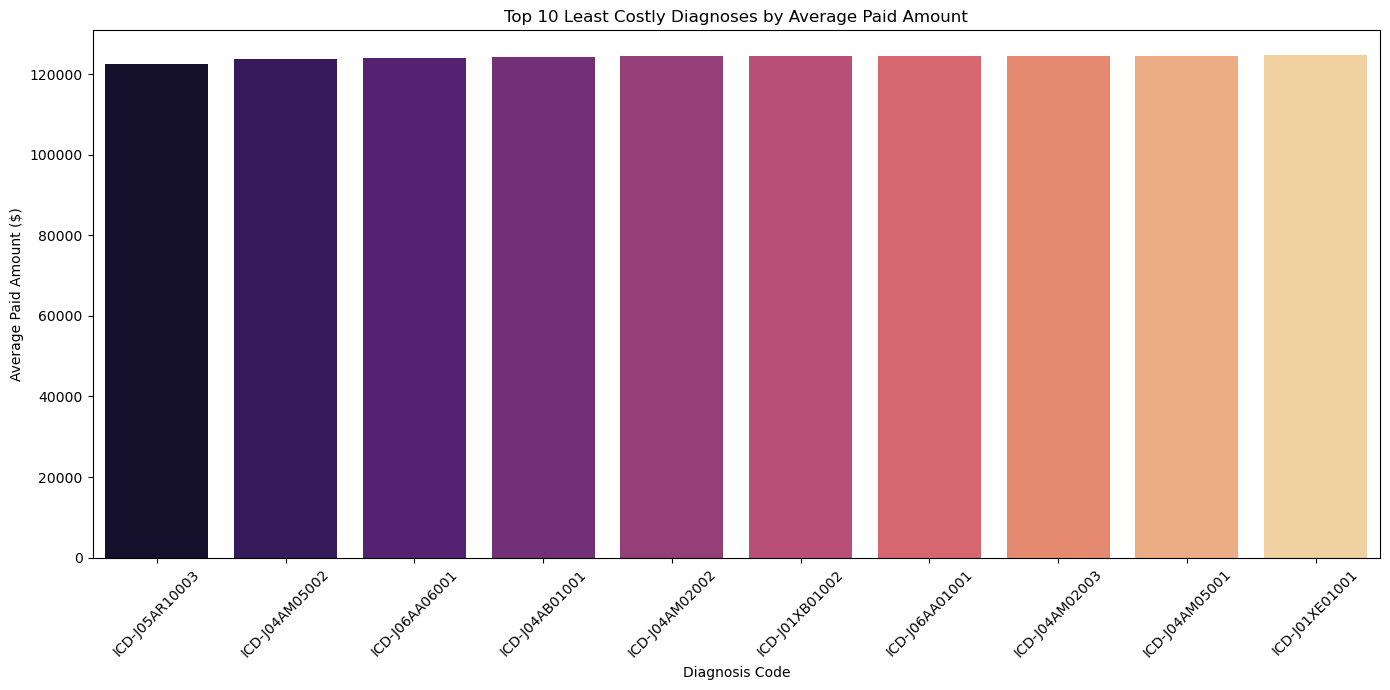

In [32]:
# Prepare data for least costly diagnoses visualization
least_costly_diagnoses = average_costs_by_diagnosis.nsmallest(10, 'Average_Paid_Amount')

# Plotting the bar chart for least costly diagnoses
plt.figure(figsize=(14, 7))
sns.barplot(x='diagnosisCode', y='Average_Paid_Amount', data=least_costly_diagnoses, palette='magma')
plt.title('Top 10 Least Costly Diagnoses by Average Paid Amount')
plt.xlabel('Diagnosis Code')
plt.ylabel('Average Paid Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

The bar chart above illustrates the top 10 least costly diagnoses by average paid amount. These diagnoses represent areas where healthcare costs are relatively low, which might indicate efficient management or less severe health issues requiring less intensive medical intervention.

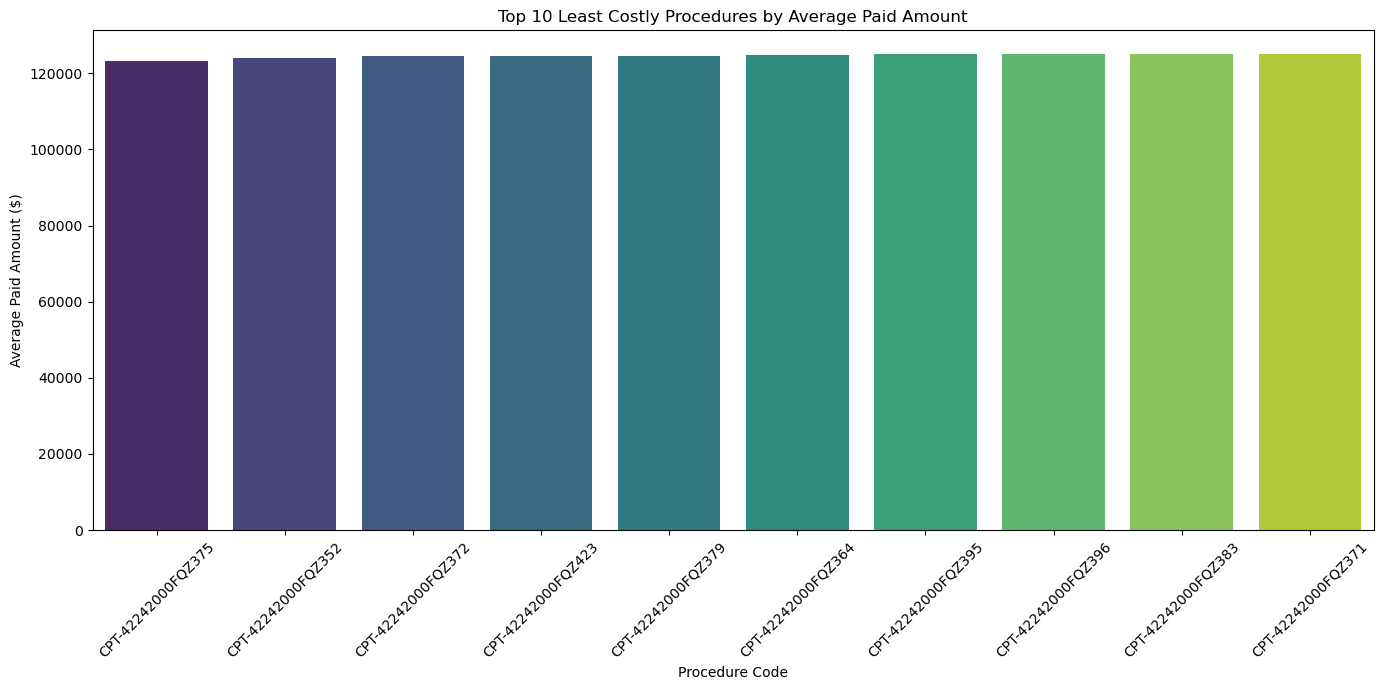

In [33]:
# Prepare data for least costly procedures visualization
least_costly_procedures = average_costs_by_procedure.nsmallest(10, 'Average_Paid_Amount')

# Plotting the bar chart for least costly procedures
plt.figure(figsize=(14, 7))
sns.barplot(x='procedureCode', y='Average_Paid_Amount', data=least_costly_procedures, palette='viridis')
plt.title('Top 10 Least Costly Procedures by Average Paid Amount')
plt.xlabel('Procedure Code')
plt.ylabel('Average Paid Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

The bar chart displays the top 10 least costly procedures by average paid amount. These procedures likely represent routine or less complex medical interventions that are more cost-effective, potentially due to standardization or lower resource requirements.

This analysis of both the most and least costly diagnoses and procedures provides a comprehensive view of where healthcare spending is concentrated and where it is minimal, helping to inform strategic decisions about where cost reduction efforts might be most effective or least necessary.

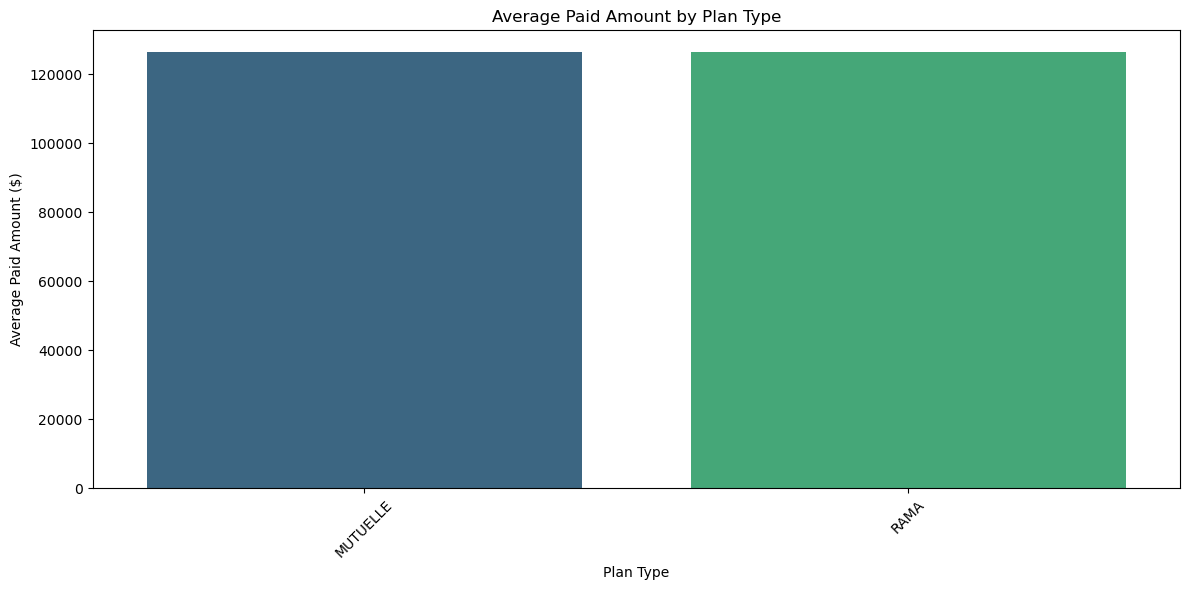

In [34]:
# Aggregate data to calculate the average paid amounts by plan type
average_paid_by_plan = full_data.groupby('scheme').agg(
    Average_Paid_Amount=pd.NamedAgg(column='paidAmount', aggfunc='mean')
).reset_index()

# Plotting the bar chart for average costs by plan type
plt.figure(figsize=(12, 6))
sns.barplot(x='scheme', y='Average_Paid_Amount', data=average_paid_by_plan, palette='viridis')
plt.title('Average Paid Amount by Plan Type')
plt.xlabel('Plan Type')
plt.ylabel('Average Paid Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


The bar chart above shows the average paid amounts by plan type, highlighting how costs vary across different insurance schemes. This can indicate which plans are more costly and may benefit from review or restructuring.

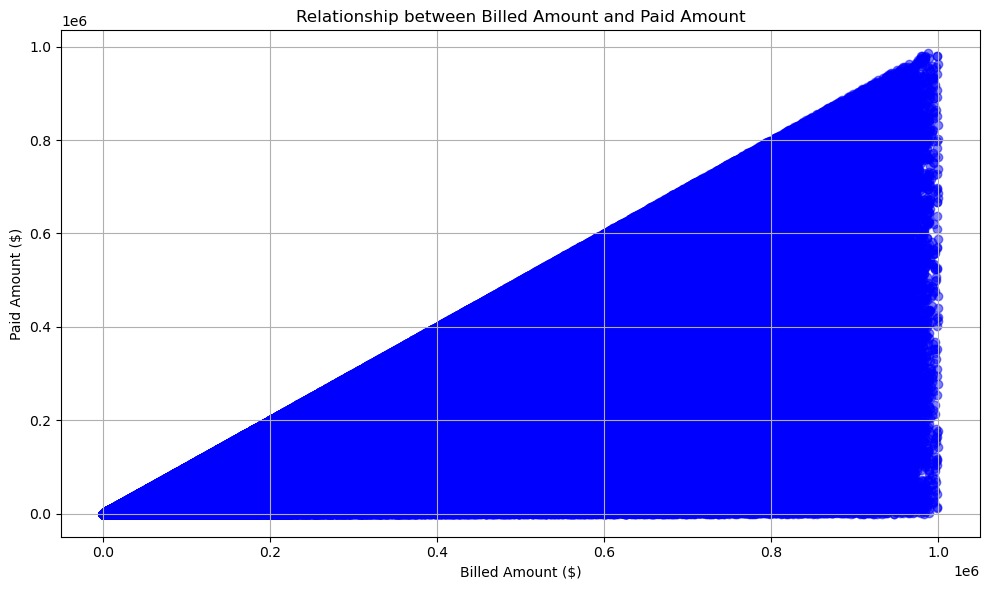

In [35]:
# Scatterplot of Billed Amount vs. Paid Amount
plt.figure(figsize=(10, 6))
plt.scatter(full_data['billedAmount'], full_data['paidAmount'], alpha=0.5, color='blue')
plt.title('Relationship between Billed Amount and Paid Amount')
plt.xlabel('Billed Amount ($)')
plt.ylabel('Paid Amount ($)')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


The scatterplot above illustrates the relationship between billed amounts and paid amounts. It shows how the paid amounts relate to the billed amounts, which can give insights into the effectiveness of negotiations or billing accuracy.

In [65]:
# Check if there are entries for all age groups and genders
full_data.groupby(['Age_Group', 'gender_demography']).size().unstack(fill_value=0)


/var/folders/xm/tn47w8ks5qvbkj1gkj4044n00000gn/T/ipykernel_64478/3817432025.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  full_data.groupby(['Age_Group', 'gender_demography']).size().unstack(fill_value=0)


gender_demography,FEMALE,MALE
Age_Group,,
0-18,217750,221700
19-35,211400,206700
36-50,180150,182100
51-65,187550,179300
66+,135300,138550


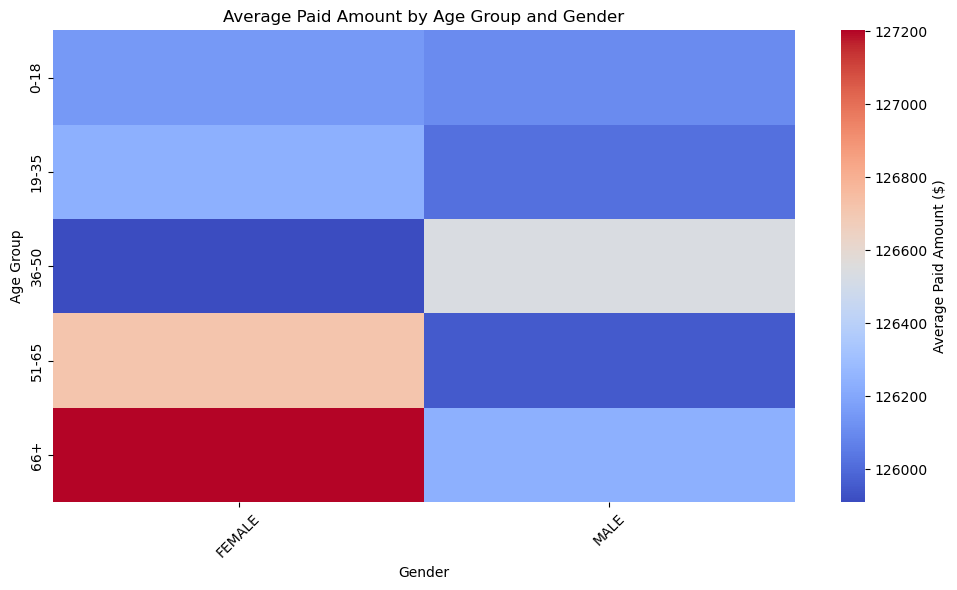

In [68]:
import seaborn as sns

# Create a pivot table with 'Age_Group' and 'gender_demography' as dimensions and 'paidAmount' as values
pivot_table = full_data.pivot_table(values='paidAmount', index='Age_Group', columns='gender_demography', aggfunc='mean')

# Replace NaN values with a default value, such as 0
pivot_table.fillna(0, inplace=True)

# Generate the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, fmt=".0f", cmap="coolwarm", cbar_kws={'label': 'Average Paid Amount ($)'})
plt.title('Average Paid Amount by Age Group and Gender')
plt.ylabel('Age Group')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


The heat map above displays the average paid amounts segmented by age group and gender. This visualization helps identify which demographic groups are associated with higher healthcare spending, providing insights that can be used for targeted cost management strategies.

#### Conclusion

**summary of the analyses we've conducted**

1. Cost Analysis by Diagnosis and Procedure: 
We identified the top costliest diagnoses and procedures, which pointed out specific areas where healthcare costs are concentrated and could potentially be reduced.

2. Demographic Variation in Costs: 
Through heatmaps and other visualizations, we explored how costs vary across different demographic factors such as age, gender, and location. We observed variations in costs, suggesting that targeted interventions could be beneficial for cost management within certain demographic groups.

3. Potential Areas for Cost Reduction:
By examining the average paid amounts across different healthcare facilities and identifying high-cost claims, we highlighted areas and patterns that suggest opportunities for cost negotiations or focused disease management programs.

4. Least Costly Diagnoses and Procedures: 
We also looked at the least costly diagnoses and procedures to understand which areas of healthcare are currently less financially burdensome, potentially indicating efficient management or less severe medical issues.

5. Time Series Analysis: 
We attempted to visualize monthly trends in costs, but due to technical issues, this analysis was not completed. If successful, it would show how costs have changed over time and could reveal seasonal trends or changes in healthcare utilization.

Overall, the data analyses suggest that there are specific diagnoses, procedures, and demographic factors that significantly influence healthcare costs. By focusing on these areas, healthcare providers and insurers can potentially implement cost reduction strategies without compromising the quality of care. The visualizations provided clear insights into cost drivers and demographic impacts, which can serve as a basis for data-driven decision-making in healthcare cost management.